In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chisquare
from scipy.stats import mannwhitneyu
from scipy import stats as sp_stats
from scipy.stats import linregress
df_total = pd.read_csv("../data/steamspy_enriched.csv")
df_enriched=df_total

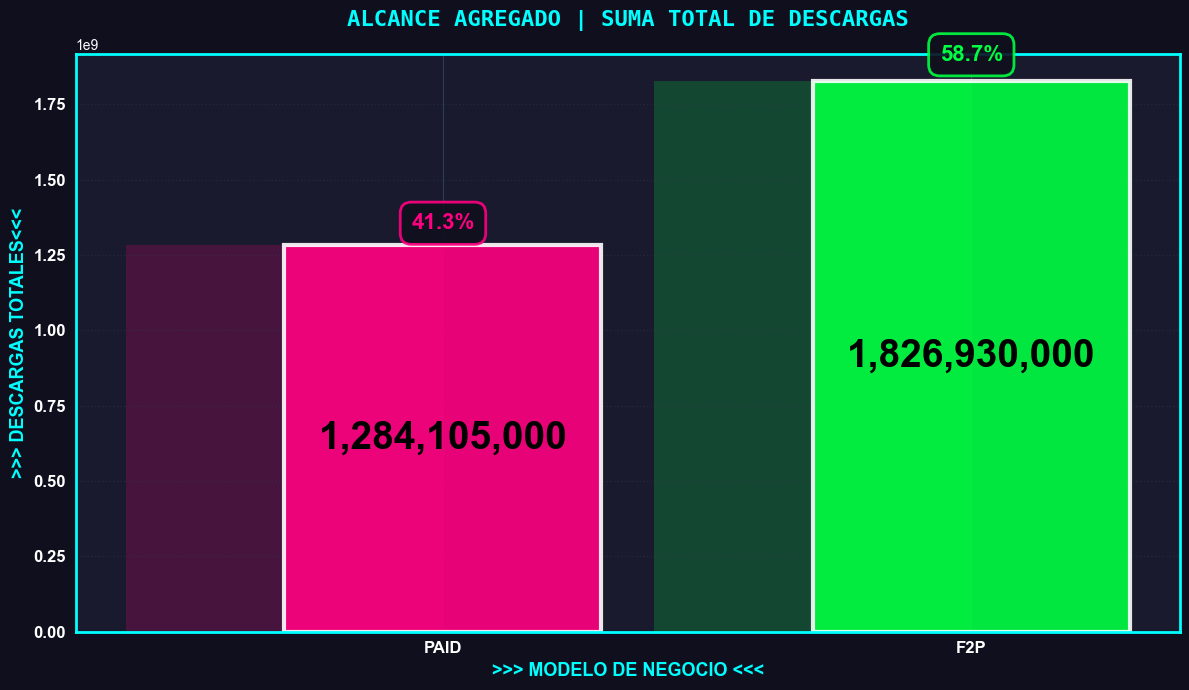

In [3]:
# Estilo gaming
plt.style.use('dark_background')
sns.set_style("darkgrid", {
    "axes.facecolor": "#1a1a2e",
    "figure.facecolor": "#0f0f1e",
    "grid.color": "#2d3e50",
    "grid.alpha": 0.3
})
COLOR_F2P = '#00ff41'
COLOR_PAID = '#ff0080'
COLOR_TEXT = '#00ffff'
# Preparamos los datos
df_total['owners_median'] = pd.to_numeric(df_total['owners_median'], errors='coerce')
# Suma total de owners por modelo
alcance_agregado = df_total.groupby('is_free')['owners_median'].sum()
# Datos
labels = ['PAID', 'F2P']
values = [alcance_agregado[False], alcance_agregado[True]]
colors = [COLOR_PAID, COLOR_F2P]
#Gráfico
fig, ax = plt.subplots(figsize=(12, 7))
# Barras principales
bars = ax.bar(labels, values, color=colors, edgecolor='white', 
              linewidth=3, alpha=0.9, width=0.6)
# Efecto glow
for i, (bar, color) in enumerate(zip(bars, colors)):
    height = bar.get_height()
    ax.bar(bar.get_x(), height, bar.get_width(), 
           color=color, alpha=0.2, linewidth=0, zorder=0)
# Valores en las barras
for i, (bar, value) in enumerate(zip(bars, values)):
    height = bar.get_height()    
    # Valor grande en el centro
    ax.text(bar.get_x() + bar.get_width()/2, height/2,
            f'{value:,.0f}',
            ha='center', va='center', fontsize=28,
            color='black', fontweight='bold')    
    # Porcentaje arriba
    pct = (value / sum(values)) * 100
    ax.text(bar.get_x() + bar.get_width()/2, height + height*0.03,
            f'{pct:.1f}%',
            ha='center', va='bottom', fontsize=16,
            color=colors[i], fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#0f0f1e',
                     edgecolor=colors[i], linewidth=2, alpha=0.9))
# Título y labels
ax.set_title('ALCANCE AGREGADO | SUMA TOTAL DE DESCARGAS',
             fontsize=16, fontweight='bold', color=COLOR_TEXT,
             family='monospace', pad=20)
ax.set_ylabel('>>> DESCARGAS TOTALES<<<', fontsize=13,
              color=COLOR_TEXT, fontweight='bold')
ax.set_xlabel('>>> MODELO DE NEGOCIO <<<', fontsize=13,
              color=COLOR_TEXT, fontweight='bold')
# Ticks en blanco
ax.tick_params(axis='both', labelsize=12, colors='white')
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
# Grid y spines
ax.grid(True, linestyle=':', linewidth=1, alpha=0.4, axis='y')
for spine in ax.spines.values():
    spine.set_edgecolor(COLOR_TEXT)
    spine.set_linewidth(2)

plt.tight_layout()
plt.show();

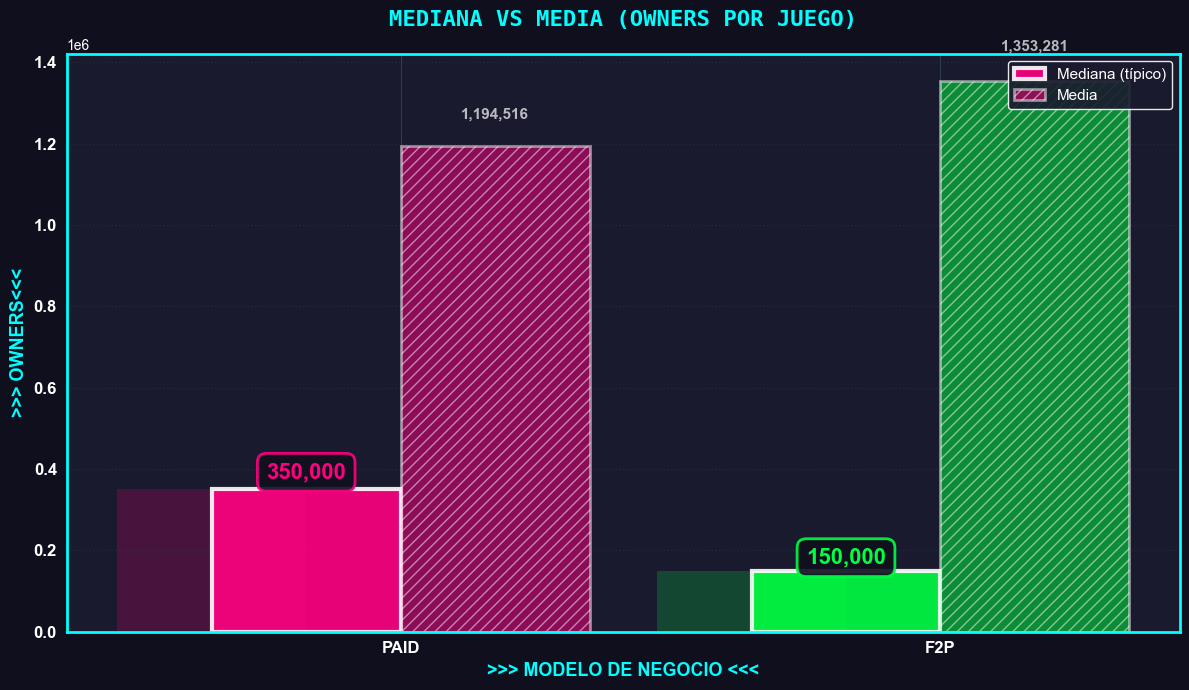

In [4]:
# Juegos típicos (mediana de owners)
# Estilo gaming
plt.style.use('dark_background')
sns.set_style("darkgrid", {
    "axes.facecolor": "#1a1a2e",
    "figure.facecolor": "#0f0f1e",
    "grid.color": "#2d3e50",
    "grid.alpha": 0.3
})
COLOR_F2P = '#00ff41'
COLOR_PAID = '#ff0080'
COLOR_TEXT = '#00ffff'
# Preparamos los datos
df_total['owners_median'] = pd.to_numeric(df_total['owners_median'], errors='coerce')
# MEDIAN de owners por modelo (juego típico)
popularidad_tipica = df_total.groupby('is_free')['owners_median'].median()
# También calcular media para comparar
media = df_total.groupby('is_free')['owners_median'].mean()
# Datos
labels = ['PAID', 'F2P']
values_median = [popularidad_tipica[False], popularidad_tipica[True]]
values_mean = [media[False], media[True]]
colors = [COLOR_PAID, COLOR_F2P]
# Gráfico
fig, ax = plt.subplots(figsize=(12, 7))
x_pos = np.arange(len(labels))
width = 0.35
# Barras de la mediana
bars1 = ax.bar(x_pos - width/2, values_median, width, 
               color=colors, edgecolor='white', linewidth=3, 
               alpha=0.9, label='Mediana (típico)')
# Barras de la media
bars2 = ax.bar(x_pos + width/2, values_mean, width,
               color=colors, edgecolor='white', linewidth=2,
               alpha=0.5, label='Media', hatch='///')
# Glow
for bar, color in zip(bars1, colors):
    height = bar.get_height()
    ax.bar(bar.get_x(), height, bar.get_width(),
           color=color, alpha=0.2, linewidth=0, zorder=0)
# Valores en las barras de MEDIANA
for i, (bar, value) in enumerate(zip(bars1, values_median)):
    height = bar.get_height()    
    ax.text(bar.get_x() + bar.get_width()/2, height + height*0.05,
            f'{value:,.0f}',
            ha='center', va='bottom', fontsize=16,
            color=colors[i], fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.4', facecolor='#0f0f1e',
                     edgecolor=colors[i], linewidth=2, alpha=0.9))
# Valores en las barras de MEDIA
for i, (bar, value) in enumerate(zip(bars2, values_mean)):
    height = bar.get_height()    
    ax.text(bar.get_x() + bar.get_width()/2, height + height*0.05,
            f'{value:,.0f}',
            ha='center', va='bottom', fontsize=11,
            color='white', fontweight='bold', alpha=0.7)
# Título y labels
ax.set_title('MEDIANA VS MEDIA (OWNERS POR JUEGO)',
             fontsize=16, fontweight='bold', color=COLOR_TEXT,
             family='monospace', pad=20)
ax.set_ylabel('>>> OWNERS<<<', fontsize=13,
              color=COLOR_TEXT, fontweight='bold')
ax.set_xlabel('>>> MODELO DE NEGOCIO <<<', fontsize=13,
              color=COLOR_TEXT, fontweight='bold')
# Leyenda
legend = ax.legend(loc='upper right', fontsize=11, framealpha=0.9,
                   facecolor='#1a1a2e', edgecolor='white')
for text in legend.get_texts():
    text.set_color('white')
# Configurar ejes
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.tick_params(axis='both', labelsize=12, colors='white')
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
for label in ax.get_yticklabels():
    label.set_color('white')
    label.set_fontweight('bold')
# Grid y spines
ax.grid(True, linestyle=':', linewidth=1, alpha=0.4, axis='y')
for spine in ax.spines.values():
    spine.set_edgecolor(COLOR_TEXT)
    spine.set_linewidth(2)
plt.tight_layout()
plt.show();

In [5]:
paid_data = df_total[df_total['is_free'] == False]['owners_median']
f2p_data = df_total[df_total['is_free'] == True]['owners_median']
stat, p_value = mannwhitneyu(paid_data, f2p_data)
print(f"Mann-Whitney U: {stat:,.0f}")
print(f"P-valor: {p_value:.6f}")
if p_value < 0.001:
    print("Diferencia significativa (p < 0.001)")
    #"El test Mann-Whitney (U = 882,162, p < 0.001) confirma que la diferencia entre Paid y F2P es estadísticamente significativa. Con un p-valor prácticamente cero, podemos afirmar con confianza que los juegos Paid tienen genuinamente más owners que los F2P, y no es casualidad."
def gini_coefficient(values):
    # Eliminar NaN y convertir a array
    values = np.array(values)
    values = values[~np.isnan(values)]    
    # Ordenar valores
    sorted_values = np.sort(values)
    n = len(values)    
    # Calcular índice de Gini
    cumsum = np.cumsum(sorted_values)
    gini = (2 * np.sum((n - np.arange(1, n+1) + 1) * sorted_values)) / (n * np.sum(sorted_values)) - (n + 1) / n    
    return gini
paid_owners = df_total[df_total['is_free'] == False]['owners_median'].dropna()
f2p_owners = df_total[df_total['is_free'] == True]['owners_median'].dropna()

gini_paid = gini_coefficient(paid_owners)
gini_f2p = gini_coefficient(f2p_owners)
print(f"Índice de Gini - PAID: {gini_paid:.3f}")
print(f"Índice de Gini - F2P:  {gini_f2p:.3f}")

Mann-Whitney U: 882,162
P-valor: 0.000000
Diferencia significativa (p < 0.001)
Índice de Gini - PAID: -0.702
Índice de Gini - F2P:  -0.845
